# Investment Value

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [7]:
# Set current amount of shares data
# YOUR CODE HERE!
number_of_shares = [200,320]

# Set the tickers
tickers = ['MSFT','AAPL']# YOUR CODE HERE!

# Create the shares DataFrame
# YOUR CODE HERE!
df = pd.DataFrame(number_of_shares, index=tickers, columns=["shares"])
# Display shares data
# YOUR CODE HERE!
df

,shares
MSFT,200
AAPL,320


In [8]:
# Load .env environment variables
# YOUR CODE HERE!
load_dotenv()

True

In [9]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [10]:
# Verify that Alpaca key and secret were correctly loaded
# YOUR CODE HERE!
print(f"{type(alpaca_api_key)}")
print(f"{type(alpaca_secret_key)}")

<class 'str'>
<class 'str'>


In [16]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key,api_version="v2")

In [17]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-04-06", tz="America/New_York").isoformat()
today

'2022-04-06T00:00:00-04:00'

In [14]:
# Set timeframe to one day ("1Day") for the Alpaca API
# YOUR CODE HERE!
timeframe = "1Day"

In [21]:
# Get current price data for MSFT and AAPL
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
msft_df = df_portfolio[df_portfolio['symbol']=='MSFT']
msft_df = msft_df[['close','symbol']]

aapl_df = df_portfolio[df_portfolio['symbol']=='AAPL']
aapl_df = aapl_df[['close','symbol']]
aapl_df
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
conc_df = pd.concat([msft_df, aapl_df])
conc_df
# Display sample data
# YOUR CODE HERE!

,close,symbol
timestamp,,
2022-04-06 04:00:00+00:00,299.50,MSFT
2022-04-06 04:00:00+00:00,171.59,AAPL


## Calculate the current value in dollars of the stock portfolio

In [28]:
# Fetch the current closing prices from the DataFrame
# YOUR CODE HERE!
msft_close = conc_df.loc[conc_df['symbol']=='MSFT']['close']
aapl_close = conc_df.loc[conc_df['symbol']=='AAPL']['close']

In [32]:
# Compute the current value in dollars of the stock portfolio
# YOUR CODE HERE!
msft_close_curr_val = msft_close * number_of_shares[0]
aapl_close_curr_val = aapl_close * number_of_shares[1]

# Print the current value of the stocks portfolio
# YOUR CODE HERE!
print(f"Current value of MSFT: $ {msft_close_curr_val[0]}")
print(f"Current value of AAPL: $ {aapl_close_curr_val[0]}")


Current value of MSFT: $ 59900.0
Current value of AAPL: $ 54908.8


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [47]:
# Set the data for the shares value DataFrame
# YOUR CODE HERE!
value_df = pd.DataFrame([msft_close_curr_val,aapl_close_curr_val],tickers)
value_df.columns = ["close"]
value_df
#value_df = value_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
# Create a DataFrame with the current value of shares
# YOUR CODE HERE!

# Display DataFrame data
# YOUR CODE HERE!
value_df.head()

,close
MSFT,59900.0
AAPL,54908.8


<AxesSubplot:ylabel='close'>

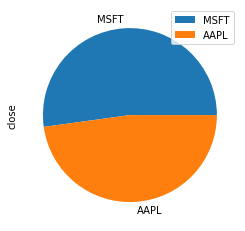

In [48]:
# Create a pie chart to show the proportion of stocks in the portfolio
# YOUR CODE HERE!
value_df.plot(kind = "pie", y = 'close')

<AxesSubplot:>

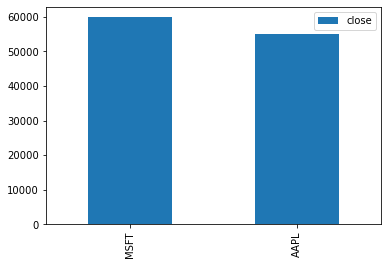

In [49]:
# Create a bar plot to show the value of shares
# YOUR CODE HERE!
value_df.plot(kind = "bar")